In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
lats = np.random.uniform(-90,90,size=1500)
lngs = np.random.uniform(-90,90,size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

12.80213747090309 -44.72454761714005
51.91589172153158 -89.95501493558147
70.50897063296622 76.74552080955038
38.40257121088709 -49.51970193915811
-81.41769619575724 -46.74240269245598
-64.85067522177903 -24.649799718120676
85.16586455836645 30.756841757319123
-81.9949831084532 -32.675071012034984
22.866590089804617 -4.027450350887847
-83.51377585999981 -50.398476040721235
-25.891629051419045 -28.17423505105772
-59.864545056678345 88.10435710368745
-69.29199174425636 38.351745117983086
81.16101180607765 -88.32071868455893
-58.505080915069286 -80.82486874424136
56.66846092521354 40.509080109060534
-89.35389316570092 -54.586490107963044
-62.94261769615846 70.27756226441522
79.1121465140697 25.952019558297508
43.867427783837456 -78.51587620746399
87.42817040309524 -25.452966041865253
-19.07317989125046 25.76406536312419
-73.634792466343 8.208969780690254
45.204793016068436 1.9321499144212453
35.58492707928211 -81.155534876707
34.09720654338034 -2.9504780583803694
-71.62741788161313 62.042

69.38405580932826 44.823777880130876
13.285218215703068 -15.314957444045348
-17.744884969604115 -73.54209581939028
84.60351299510964 14.201516287873048
-44.600188853291584 -80.43352574269402
-19.122000401720825 30.443795475906143
15.69426264649293 84.88061147131927
-70.16408425309095 -32.06675376798231
-64.56327172651997 -41.36432923927403
48.63980886433086 -55.32615353489953
58.9853669451993 -45.95006206416527
-67.24230156401792 50.42997755676643
-89.94331424255132 55.21562806519867
-85.03054030279729 -40.4945497548974
-17.79551166316641 26.90380522667914
-24.10773355600402 47.285283632514194
51.070810617864254 30.02502364273829
-41.56715767311823 -72.23214585178891
-63.305943874846456 -47.35861833410192
45.89887798593438 47.60467243404611
-10.058954201287193 47.4393878846268
-3.947666195859213 6.933595670188907
84.9352272863795 -31.829928682162297
-22.110078882467477 -43.07624552737136
-63.38457870144967 89.22249321096888
3.8259463338907267 0.5612792629192853
22.037200158789744 44.21

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):
   
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | cayenne
Processing Record 2 of Set 1 | sioux lookout
Processing Record 3 of Set 1 | tazovskiy
Processing Record 4 of Set 1 | torbay
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | chuy
Processing Record 7 of Set 1 | berlevag
Processing Record 8 of Set 1 | taoudenni
Processing Record 9 of Set 1 | vila velha
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | nerl
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | honningsvag
Processing Record 17 of Set 1 | port hope
Processing Record 18 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 19 of Set 1 | pandamatenga
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | tulle
Processing Record 22 of Set 1 | newton
Processing Record 23 of Set 1 | nador
Processing Record 24

Processing Record 39 of Set 4 | san carlos de bariloche
Processing Record 40 of Set 4 | carlos chagas
Processing Record 41 of Set 4 | vieste
Processing Record 42 of Set 4 | carikar
City not found. Skipping...
Processing Record 43 of Set 4 | aripuana
Processing Record 44 of Set 4 | azimur
City not found. Skipping...
Processing Record 45 of Set 4 | los llanos de aridane
Processing Record 46 of Set 4 | bayir
Processing Record 47 of Set 4 | sokoto
Processing Record 48 of Set 4 | hofn
Processing Record 49 of Set 4 | albany
Processing Record 50 of Set 4 | axim
Processing Record 1 of Set 5 | kano
Processing Record 2 of Set 5 | samandag
Processing Record 3 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 4 of Set 5 | kargasok
Processing Record 5 of Set 5 | saint simons
Processing Record 6 of Set 5 | teresina
Processing Record 7 of Set 5 | maldonado
Processing Record 8 of Set 5 | lagoa
Processing Record 9 of Set 5 | hukuntsi
Processing Record 10 of Set 5 | mercedes
Processi

Processing Record 27 of Set 8 | santa rosa
Processing Record 28 of Set 8 | mudyuga
City not found. Skipping...
Processing Record 29 of Set 8 | verkhnyaya inta
Processing Record 30 of Set 8 | marsh harbour
Processing Record 31 of Set 8 | jhang
Processing Record 32 of Set 8 | antofagasta
Processing Record 33 of Set 8 | kudahuvadhoo
Processing Record 34 of Set 8 | lahan
Processing Record 35 of Set 8 | karasburg
Processing Record 36 of Set 8 | gusau
Processing Record 37 of Set 8 | nobres
Processing Record 38 of Set 8 | coquimbo
Processing Record 39 of Set 8 | ilulissat
Processing Record 40 of Set 8 | san rafael del sur
Processing Record 41 of Set 8 | suleja
Processing Record 42 of Set 8 | ust-tsilma
Processing Record 43 of Set 8 | cap-aux-meules
Processing Record 44 of Set 8 | buraydah
Processing Record 45 of Set 8 | kuche
City not found. Skipping...
Processing Record 46 of Set 8 | maloy
Processing Record 47 of Set 8 | araguaina
Processing Record 48 of Set 8 | warangal
Processing Record 49

Processing Record 14 of Set 12 | sao raimundo nonato
Processing Record 15 of Set 12 | garango
Processing Record 16 of Set 12 | aswan
Processing Record 17 of Set 12 | hamburg
Processing Record 18 of Set 12 | kovdor
Processing Record 19 of Set 12 | atasu
Processing Record 20 of Set 12 | la palma
Processing Record 21 of Set 12 | nara
Processing Record 22 of Set 12 | annau
Processing Record 23 of Set 12 | cumberland
Processing Record 24 of Set 12 | jamame
Processing Record 25 of Set 12 | viedma
Processing Record 26 of Set 12 | urucara
Processing Record 27 of Set 12 | iskateley
Processing Record 28 of Set 12 | karkaralinsk
City not found. Skipping...
Processing Record 29 of Set 12 | cutler ridge
Processing Record 30 of Set 12 | mbekenyera
Processing Record 31 of Set 12 | brigantine
Processing Record 32 of Set 12 | bukama
Processing Record 33 of Set 12 | paita
Processing Record 34 of Set 12 | dinga
Processing Record 35 of Set 12 | nanga eboko
Processing Record 36 of Set 12 | tabory
Processin

In [12]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Araouane,18.90,-3.53,100.38,16,47,5.70,ML,2020-04-16 14:36:52
1,Beloha,-25.17,45.05,82.06,54,0,9.73,MG,2020-04-16 14:36:52
2,Chuy,-33.70,-53.46,70.16,71,42,12.71,UY,2020-04-16 14:36:52
3,Ushuaia,-54.80,-68.30,50.00,71,98,5.48,AR,2020-04-16 14:36:52
4,Kalmunai,7.42,81.82,83.17,75,81,7.18,LK,2020-04-16 14:36:52
5,Saint-Philippe,-21.36,55.77,78.80,65,7,24.16,RE,2020-04-16 14:36:52
6,Georgetown,5.41,100.34,86.00,83,20,3.36,MY,2020-04-16 14:34:07
7,Longyearbyen,78.22,15.64,35.60,59,20,9.17,SJ,2020-04-16 14:34:38
8,Sao Joao Da Barra,-21.64,-41.05,77.00,83,96,2.24,BR,2020-04-16 14:36:52
9,Jamestown,42.10,-79.24,32.00,68,75,6.93,US,2020-04-16 14:36:52


In [13]:
new_column_order = ["City","Country","Date","Lat","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df[new_column_order]

,City,Country,Date,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
0,Araouane,ML,2020-04-16 14:36:52,18.90,100.38,16,47,5.70
1,Beloha,MG,2020-04-16 14:36:52,-25.17,82.06,54,0,9.73
2,Chuy,UY,2020-04-16 14:36:52,-33.70,70.16,71,42,12.71
3,Ushuaia,AR,2020-04-16 14:36:52,-54.80,50.00,71,98,5.48
4,Kalmunai,LK,2020-04-16 14:36:52,7.42,83.17,75,81,7.18
...,...,...,...,...,...,...,...,...
561,Mahibadhoo,MV,2020-04-16 14:37:42,3.78,86.52,64,58,2.93
562,Encruzilhada Do Sul,BR,2020-04-16 14:37:42,-30.54,66.13,51,0,8.37
563,Mponela,MW,2020-04-16 14:37:42,-13.53,80.60,51,20,14.99
564,Lafia,NG,2020-04-16 14:37:01,8.48,107.38,11,0,6.53


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Retrieve the data we need to create our scatter plots
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
import time

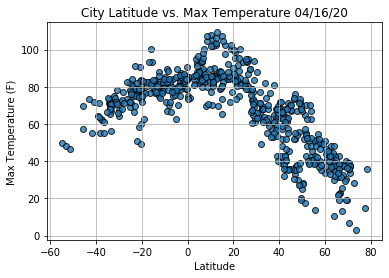

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor = "black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")
    
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

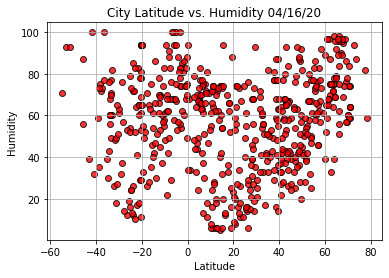

In [18]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor = "black",
            linewidths=1,
            color="red",
            marker="o",
            alpha=0.8,
            label="Cities")
    
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

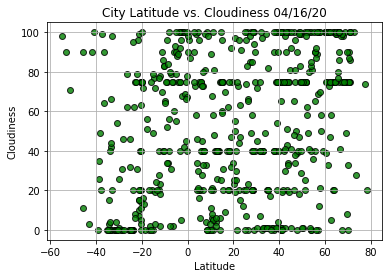

In [19]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor = "black",
            linewidths=1,
            color="green",
            marker="o",
            alpha=0.8,
            label="Cities")
    
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

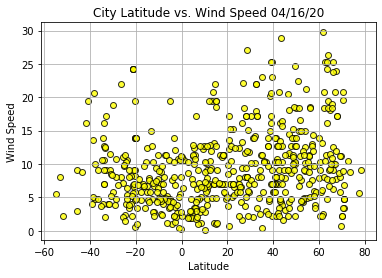

In [20]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor = "black",
            linewidths=1,
            color="yellow",
            marker="o",
            alpha=0.8,
            label="Cities")
    
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [21]:
from scipy.stats import linregress

In [22]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show() 

In [23]:
index13 = city_data_df.loc[13]
index13

City                Graaff-Reinet
Lat                        -32.25
Lng                         24.53
Max Temp                       75
Humidity                       26
Cloudiness                      0
Wind Speed                      4
Country                        ZA
Date          2020-04-16 14:36:52
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4       True
       ...  
561     True
562    False
563    False
564     True
565    False
Name: Lat, Length: 566, dtype: bool

In [25]:
# Create Northern Hemisphere DataFrame.
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Araouane,18.90,-3.53,100.38,16,47,5.70,ML,2020-04-16 14:36:52
4,Kalmunai,7.42,81.82,83.17,75,81,7.18,LK,2020-04-16 14:36:52
6,Georgetown,5.41,100.34,86.00,83,20,3.36,MY,2020-04-16 14:34:07
7,Longyearbyen,78.22,15.64,35.60,59,20,9.17,SJ,2020-04-16 14:34:38
9,Jamestown,42.10,-79.24,32.00,68,75,6.93,US,2020-04-16 14:36:52


In [26]:
# Create Southern Hemisphere DataFrame.
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Beloha,-25.17,45.05,82.06,54,0,9.73,MG,2020-04-16 14:36:52
2,Chuy,-33.70,-53.46,70.16,71,42,12.71,UY,2020-04-16 14:36:52
3,Ushuaia,-54.80,-68.30,50.00,71,98,5.48,AR,2020-04-16 14:36:52
5,Saint-Philippe,-21.36,55.77,78.80,65,7,24.16,RE,2020-04-16 14:36:52
8,Sao Joao Da Barra,-21.64,-41.05,77.00,83,96,2.24,BR,2020-04-16 14:36:52


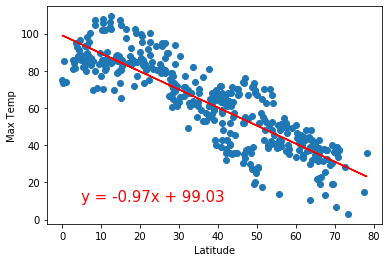

In [27]:
# Linear regression on the Northern Hemisphere 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 
                       'Max Temp',(5,10))

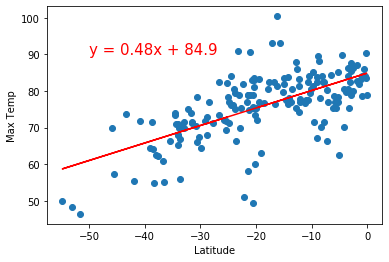

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 
                       'Max Temp',(-50,90))

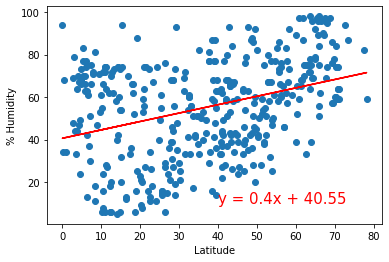

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', 
                       '% Humidity',(40,10))

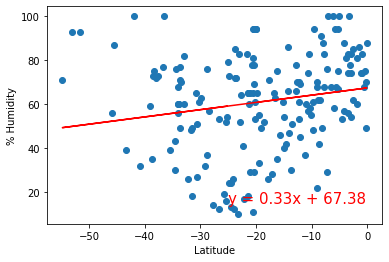

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', 
                       '% Humidity',(-25,15))

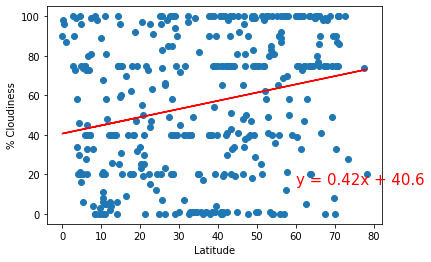

In [31]:
## Skill Drill 6.4.4
# Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(60,15))

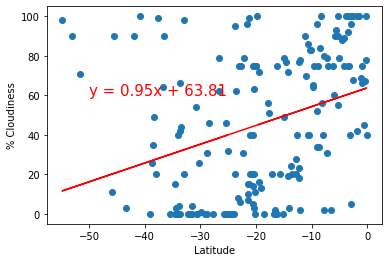

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(-50,60))

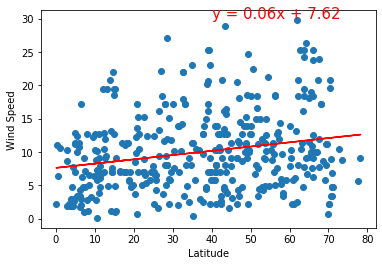

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 
                       'Wind Speed',(40,30))

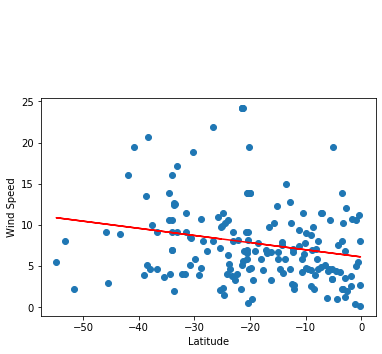

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 
                       'Wind Speed',(-50,35))